##Breast Cancer Diagnosis Using Support Vector Machine (SVM) with Hyper-Parameter Tuning
###In this project, we focus on building an efficient classification model for diagnosing breast cancer using the Breast Cancer Wisconsin (Diagnostic) Dataset from Kaggle. This dataset contains important diagnostic features extracted from cell nuclei images, which are crucial for distinguishing between benign and malignant cases of breast cancer.

###We will be implementing a Support Vector Machine (SVM) Classifier to effectively separate these two classes. SVM is well-suited for this classification task as it aims to find the optimal hyperplane to maximize the margin between classes, ensuring robust predictive performance.

###To enhance model accuracy and generalization, we’ll perform hyper-parameter tuning on key parameters like kernel type, regularization (C), and kernel-specific parameters (e.g., gamma for RBF kernel). This approach allows us to identify the best configuration for our SVM model to achieve optimal performance on unseen data.

###This notebook includes:

* Exploratory Data Analysis (EDA) - Understanding data distribution, feature relationships, and class imbalances.
* Data Preprocessing - Scaling features and handling any missing values to ensure model consistency.
* Model Building and Tuning - Implementing SVM with hyper-parameter tuning using cross-validation.
* Evaluation - Using metrics like accuracy, precision, recall, and F1-score to assess model performance.

###This project showcases the effectiveness of SVM for medical diagnosis and highlights the critical role of tuning parameters to achieve the best results for accurate and reliable breast cancer prediction.

In [1]:
# Data manipulation and visualization
import pandas as pd # It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np # It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
import matplotlib.pyplot as plt  # Import libraries for creating visualizations, aliased as plt.
import seaborn as sns # Import libraries for creating visualizations, aliased as sns.

from sklearn import datasets #Imports tools to load and use built-in or fetched datasets for machine learning tasks.
from sklearn.model_selection import train_test_split #Imports the function to split data into random train and test subsets for model evaluation.
from sklearn.preprocessing import StandardScaler #Imports the tool to standardize features by removing the mean and scaling to unit variance.
from sklearn.svm import SVC #Imports the Support Vector Classification model for building classification models.
from sklearn.metrics import accuracy_score #Imports the tool to calculate the accuracy of a classification model.


In [2]:
df = pd.read_csv('data (1).csv') # It reads the data from the CSV file named 'data (1).csv' and stores it in a Pandas DataFrame called 'df'.

In [3]:
df.head() # It displays the first 5 rows of the DataFrame df.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape # It returns the dimensions of the DataFrame df as a tuple (number of rows, number of columns).

(569, 33)

In [5]:
df.columns # It returns the names of all columns in the DataFrame df.

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.dtypes # It returns the data type of each column in the DataFrame df.

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [7]:
df.isnull().sum() # It returns the total number of missing values (NaN) in each column of the DataFrame df.

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # 1 = Malignant, 0 = Benign
# It replaces 'M' with 1 and 'B' with 0 in the 'diagnosis' column of the DataFrame df.

In [9]:
# Dropping non-informative columns like ID and any unrelated columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Step 4: Splitting the Data into Training and Testing Sets
X = df.drop(['diagnosis'], axis=1)  # Features
y = df['diagnosis']                # Target variable
# These lines create the feature matrix X by dropping the 'diagnosis' column and the target variable y by selecting the 'diagnosis' column from the DataFrame df.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# It splits the features (X) and target (y) into training (80%) and testing (20%) sets using random sampling with a fixed seed for reproducibility.

In [13]:
# Step 5: Data Preprocessing - Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# These lines standardize the features in X_train and X_test using StandardScaler by removing the mean and scaling to unit variance.

In [14]:
# Step 6: Model Building - Initialize SVM with Hyper-Parameter Tuning
# Set up the hyper-parameter grid for tuning
param_grid = { # This dictionary is a key component in hyperparameter tuning.
    'C': [0.1, 1, 10, 100], #Regularization parameter, 'C': [0.1, 1, 10, 100] means that the tuning process will try these four different values for the regularization parameter C.
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Kernel coefficient (influences the shape of the decision boundary).
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] # Specifies the type of kernel used by the SVM (e.g., linear, radial basis function (RBF), polynomial).
}

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Set up GridSearchCV for exhaustive search
svc = SVC() #  Creates an instance of the Support Vector Classifier (SVC) with default parameters. This will be the base model for the grid search.
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
# These lines automate the process of finding the optimal hyperparameters for the SVM model by trying out different combinations, evaluating them, and selecting the best one based on accuracy.
# This can significantly improve the model's predictive performance.

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [16]:
# Step 7: Get Best Parameters and Build Final Model
print("Best Parameters found:", grid_search.best_params_)
best_svc = grid_search.best_estimator_
# These lines help you identify and utilize the most effective SVM model configuration based on the results of the hyperparameter tuning process.
# The best_svc variable now holds your optimized SVM model, which can be used for making predictions on new data.

Best Parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [17]:
# Step 8: Model Evaluation on Test Set
y_pred = best_svc.predict(X_test)
# This line applies your best SVM model to the test data to generate predictions, which you can then compare to the actual target values (y_test) to evaluate the model's performance.

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Display Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


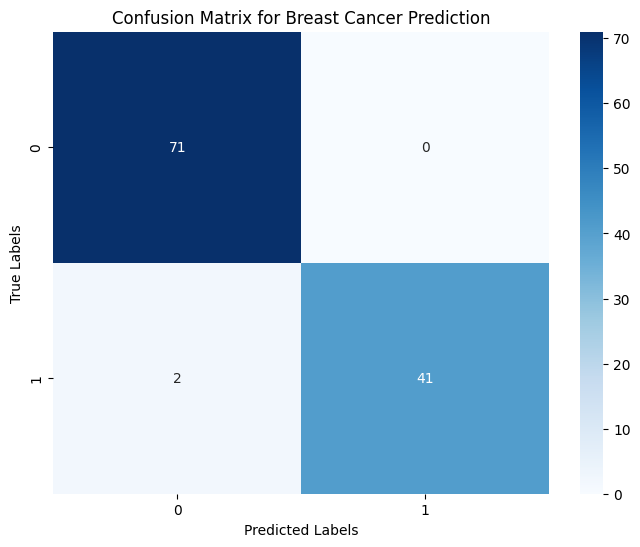

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Breast Cancer Prediction')
plt.show()